In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/HousingData.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
data.shape

(506, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(24.05000000000001, 0.5, 'median value of owner-occupied homes in 1000s')

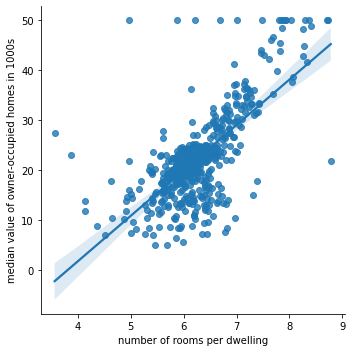

In [6]:
# lmplot() provides scatterplot and also try to fit in linear model 
sns.lmplot('RM', 'MEDV', data)
plt.xlabel("number of rooms per dwelling")
plt.ylabel("median value of owner-occupied homes in 1000s")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(24.05000000000001, 0.5, 'median value of owner-occupied homes in 1000s')

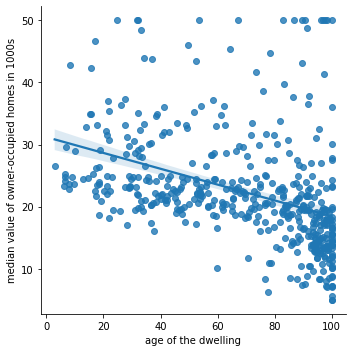

In [7]:
# lmplot() provides scatterplot and also try to fit in linear model 
sns.lmplot('AGE', 'MEDV', data)
plt.xlabel("age of the dwelling")
plt.ylabel("median value of owner-occupied homes in 1000s")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(24.05000000000001, 0.5, 'median value of owner-occupied homes in 1000s')

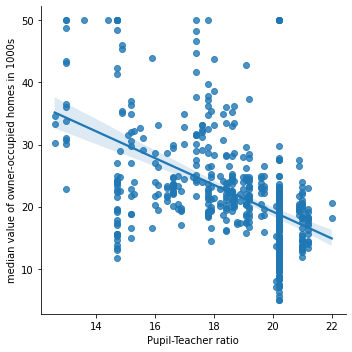

In [8]:
# lmplot() provides scatterplot and also try to fit in linear model 
sns.lmplot('PTRATIO', 'MEDV', data)
plt.xlabel("Pupil-Teacher ratio")
plt.ylabel("median value of owner-occupied homes in 1000s")

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [10]:
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [11]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
x_train.shape, y_train.shape 

((315, 13), (315,))

In [14]:
x_test.shape, y_test.shape 

((79, 13), (79,))

In [15]:
linear_regression = LinearRegression() 

In [16]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = linear_regression.predict(x_test) 

In [18]:
print("Training Score : ", linear_regression.score(x_train, y_train))

Training Score :  0.7979961473127297


In [19]:
from sklearn.metrics import r2_score
print("Testing Score : ", r2_score(y_test, y_pred))

Testing Score :  0.5806563123015831


**Using Linear Regression Formula**

In [20]:
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
# convert into numpy array
X = np.array(X)

In [22]:
# adding intercept
X = sm.add_constant(X)

In [23]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     96.29
Date:                Thu, 03 Feb 2022   Prob (F-statistic):          1.75e-111
Time:                        10:15:42   Log-Likelihood:                -1143.4
No. Observations:                 394   AIC:                             2315.
Df Residuals:                     380   BIC:                             2370.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.6801      5.681      5.752      0.000      21.509      43.851
x1            -0.0976      0.032     -3.007      0.003      -0.161      -0.034
x2             0.0489      0.014      3.397      0.001       0.021       0.077
x3             0.0304      0.066      0.461      0.645      -0.099       0.160
x4             2.7694      0.925      2.993      0.003       0.950       4.588
x5           -17.9690      4.243     -4.235      0.000     -26.311      -9.627
x6             4.2833      0.471      9.100      0.000       3.358       5.209
x7            -0.0130      0.014     -0.898      0.370      -0.041       0.015
x8            -1.4585      0.211     -6.912      0.000      -1.873      -1.044
x9             0.2859      0.069      4.125      0.000       0.150       0.422
x10           -0.0131      0.004     -3.324      0.001      -0.021      -0.005
x11           -0.9146      0.141     -6.506      0.000      -1.191      -0.638
x12            0.0097      0.003      3.251      0.001       0.004       0.015
x13           -0.4237      0.055     -7.700      0.000      -0.532      -0.315
==============================================================================
Omnibus:                      161.243   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              904.814
Skew:                           1.657   Prob(JB):                    3.33e-197
Kurtosis:                       9.643   Cond. No.                     1.57e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""